<a href="https://colab.research.google.com/github/farizebra/CFR03-Fish-Recommendation/blob/main/FISHKU_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Pake Google Drive

from google.colab import drive
drive.mount('/content/drive')

zip_path = '/content/drive/My Drive/FishImages4.zip'

zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('tmp/FishImages4')

zip_ref.close()

Mounted at /content/drive


In [ ]:
#JIKA MENGGUNAKAN FILE
#from google.colab import files

# Upload a file from your local machine
#uploaded = files.upload()

# Check the uploaded files
#for filename in uploaded.keys():
#    print(f'File "{filename}" uploaded successfully!')

In [ ]:
# JIKA MENGGUNAKAN LINK
# Download the dataset
#!wget https://drive.google.com/file/d/15tI1ylgprxTGWnkoz9N5ljR2pIgBw5_s/view?usp=sharing

--2023-12-06 15:01:37--  https://drive.google.com/file/d/15tI1ylgprxTGWnkoz9N5ljR2pIgBw5_s/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 74.125.137.100, 74.125.137.102, 74.125.137.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  82.62K  --.-KB/s    in 0.007s  

2023-12-06 15:01:38 (11.0 MB/s) - ‘view?usp=sharing’ saved [84601]



In [ ]:
# import zipfile
#import os

# Unzip the dataset
#local_zip = '/tmp/FishImages.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

#zip_ref = zipfile.ZipFile('./FishImages.zip', 'r')
#zip_ref.extractall('tmp/FishImages')

#zip_ref.close()


FileNotFoundError: ignored

In [ ]:
source_path = 'tmp/FishImages4'

source_path_Lele = os.path.join(source_path, 'Lele')
source_path_Gurame = os.path.join(source_path, 'Gurame')
source_path_Tongkol = os.path.join(source_path, 'Tongkol')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find tmp/FishImages/ -type f ! -name "*.jpg" ! -name "*.png" ! -name "*.jpeg"  -exec rm {} +
# !find tmp/FishImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_Lele))} images of lele.")
print(f"There are {len(os.listdir(source_path_Gurame))} images of gurame.")
print(f"There are {len(os.listdir(source_path_Tongkol))} images of tongkol.")

find: ‘tmp/FishImages/’: No such file or directory
There are 219 images of lele.
There are 271 images of gurame.
There are 97 images of tongkol.


In [ ]:
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt

root_dir = '/tmp/FishClass'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  os.makedirs(os.path.join(root_path,'training'))
  os.makedirs(os.path.join(f'{root_path}/training','Lele'))
  os.makedirs(os.path.join(f'{root_path}/training','Gurame'))
  os.makedirs(os.path.join(f'{root_path}/training','Tongkol'))
  os.makedirs(os.path.join(root_path,'validation'))
  os.makedirs(os.path.join(f'{root_path}/validation','Lele'))
  os.makedirs(os.path.join(f'{root_path}/validation','Gurame'))
  os.makedirs(os.path.join(f'{root_path}/validation','Tongkol'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/FishClass/training
/tmp/FishClass/validation
/tmp/FishClass/training/Gurame
/tmp/FishClass/training/Lele
/tmp/FishClass/training/Tongkol
/tmp/FishClass/validation/Gurame
/tmp/FishClass/validation/Lele
/tmp/FishClass/validation/Tongkol


In [ ]:
import random

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  files = []
  for filename in os.listdir(SOURCE_DIR):
    file = SOURCE_DIR+ filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print( filename + "filename is zero length, so ignoring.")

  training_lenght = int(len(files)*SPLIT_SIZE)
  testing_lenght = int(len(files) - training_lenght)
  shuffling = random.sample(files,len(files))
  training_set = shuffling[0:training_lenght]
  testing_set = shuffling[-testing_lenght:]

  for filename in training_set:
    first = SOURCE_DIR + filename
    final = TRAINING_DIR + filename
    copyfile(first,final)
  for filename in testing_set:
    first = SOURCE_DIR + filename
    final = VALIDATION_DIR + filename
    copyfile(first,final)


In [ ]:

LELE_SOURCE_DIR = "tmp/FishImages4/Lele/"
GURAME_SOURCE_DIR = "tmp/FishImages4/Gurame/"
TONGKOL_SOURCE_DIR = "tmp/FishImages4/Tongkol/"

TRAINING_DIR = "/tmp/FishClass/training/"
VALIDATION_DIR = "/tmp/FishClass/validation/"

TRAINING_LELE_DIR = os.path.join(TRAINING_DIR, "Lele/")
VALIDATION_LELE_DIR = os.path.join(VALIDATION_DIR, "Lele/")

TRAINING_GURAME_DIR = os.path.join(TRAINING_DIR, "Gurame/")
VALIDATION_GURAME_DIR = os.path.join(VALIDATION_DIR, "Gurame/")

TRAINING_TONGKOL_DIR = os.path.join(TRAINING_DIR, "Tongkol/")
VALIDATION_TONGKOL_DIR = os.path.join(VALIDATION_DIR, "Tongkol/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_LELE_DIR)) > 0:
  for file in os.scandir(TRAINING_LELE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_GURAME_DIR)) > 0:
  for file in os.scandir(TRAINING_GURAME_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_TONGKOL_DIR)) > 0:
  for file in os.scandir(TRAINING_TONGKOL_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LELE_DIR)) > 0:
  for file in os.scandir(VALIDATION_LELE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_GURAME_DIR)) > 0:
  for file in os.scandir(VALIDATION_GURAME_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_TONGKOL_DIR)) > 0:
  for file in os.scandir(VALIDATION_TONGKOL_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(LELE_SOURCE_DIR, TRAINING_LELE_DIR, VALIDATION_LELE_DIR, split_size)
split_data(GURAME_SOURCE_DIR, TRAINING_GURAME_DIR, VALIDATION_GURAME_DIR, split_size)
split_data(TONGKOL_SOURCE_DIR, TRAINING_TONGKOL_DIR, VALIDATION_TONGKOL_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal lele's directory has {len(os.listdir(LELE_SOURCE_DIR))} images")
print(f"Original gurame's directory has {len(os.listdir(GURAME_SOURCE_DIR))} images\n")
print(f"Original tongkol's directory has {len(os.listdir(TONGKOL_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_LELE_DIR))} images of lele for training")
print(f"There are {len(os.listdir(TRAINING_GURAME_DIR))} images of gurame for training")
print(f"There are {len(os.listdir(TRAINING_TONGKOL_DIR))} images of tongkol for training")
print(f"There are {len(os.listdir(VALIDATION_LELE_DIR))} images of lele for validation")
print(f"There are {len(os.listdir(VALIDATION_GURAME_DIR))} images of gurame for validation")
print(f"There are {len(os.listdir(VALIDATION_TONGKOL_DIR))} images of tongkol for validation")



Original lele's directory has 219 images
Original gurame's directory has 271 images

Original tongkol's directory has 97 images

There are 175 images of lele for training
There are 216 images of gurame for training
There are 77 images of tongkol for training
There are 44 images of lele for validation
There are 55 images of gurame for validation
There are 20 images of tongkol for validation


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode="nearest")

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                                target_size=(150,150))

  return train_generator, validation_generator

In [ ]:

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 467 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.9):
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      #tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(512, activation='relu'),
      #tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  optimizers = tf.keras.optimizers.Adam(learning_rate = 0.0001)

  model.compile(loss = 'categorical_crossentropy', optimizer=optimizers, metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model = create_model()
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=200,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 17, 17, 128)      

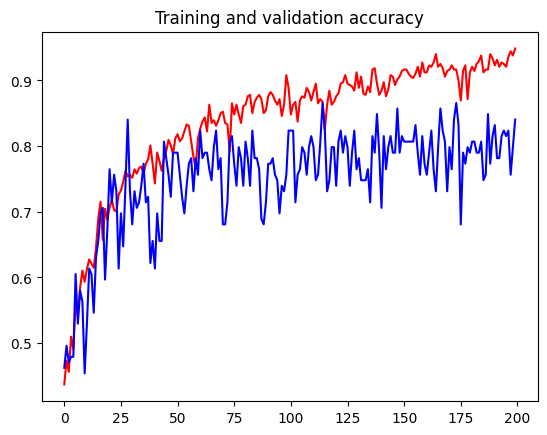

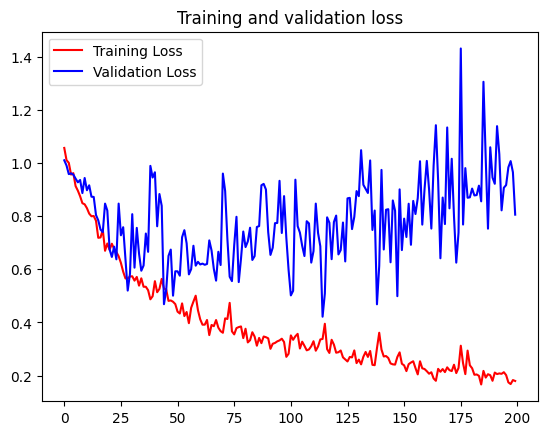

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#MODEL PREDICTION

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 66.jpg to 66 (1).jpg
Saving 60b2e4ed269a0.jpg to 60b2e4ed269a0 (1).jpg
Saving 7.jpg to 7.jpg
1/1 [==============================] - 0s 112ms/step
66 (1).jpg
[[0. 1. 0.]]
1/1 [==============================] - 0s 26ms/step
60b2e4ed269a0 (1).jpg
[[1. 0. 0.]]
1/1 [==============================] - 0s 26ms/step
7.jpg
[[0. 1. 0.]]


In [ ]:

if np.argmax(classes)==0:
  print(fn + " is a gurame")
elif np.argmax(classes)==1:
  print(fn + " is a lele")
elif np.argmax(classes)==2:
  print(fn + " is a tongkol")
else:
  print(fn + " is a error")

missouriflies-com-9d775cd7c946c5953fef55cb9ecbe57a (1).jpg is a gurame


In [ ]:
# Save the trained model as a Keras HDF5 file.
import time
saved_model_path = "./my_model.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

/bin/bash: line 1: tensorflowjs_converter: command not found


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored